## Data Understanding and Data Preparation

## Import required package

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import missingno as msno

In [ ]:
#%pip install seaborn
#%pip install missingno

## Import the dataset

Dataset is available online as comma separated values document

In [3]:
# File Link
LinkToFile = "https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv"
# Import the data into a DataFrame
df = pd.read_csv(LinkToFile)

Very first inspection of the DataFrame

In [5]:
# Print out the first five cases
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
# We have 53,940 rows and 10 columns
df.shape

(53940, 10)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [10]:
# Analyse the object-variables
# top --> mode 8most frequent level in a variable)
df.describe(include=['object']).transpose()

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


## Data Understanding

As Exercise --> until 14:25h --> Please analyze the dataset

Task: We are interested in running a regression like model to predict `price`

<Axes: xlabel='price', ylabel='Count'>

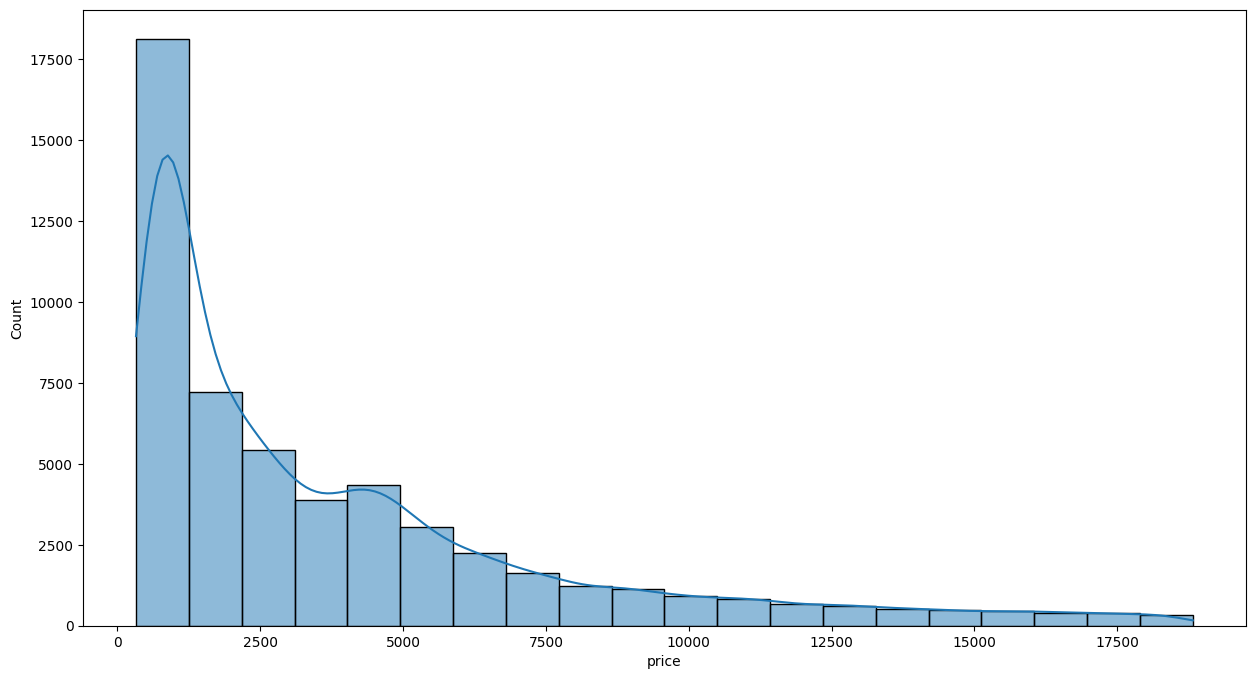

In [19]:
plt.figure(figsize=(15,8))
sns.histplot(df.price, kde=True, bins=20, label="Distribution of Price")

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

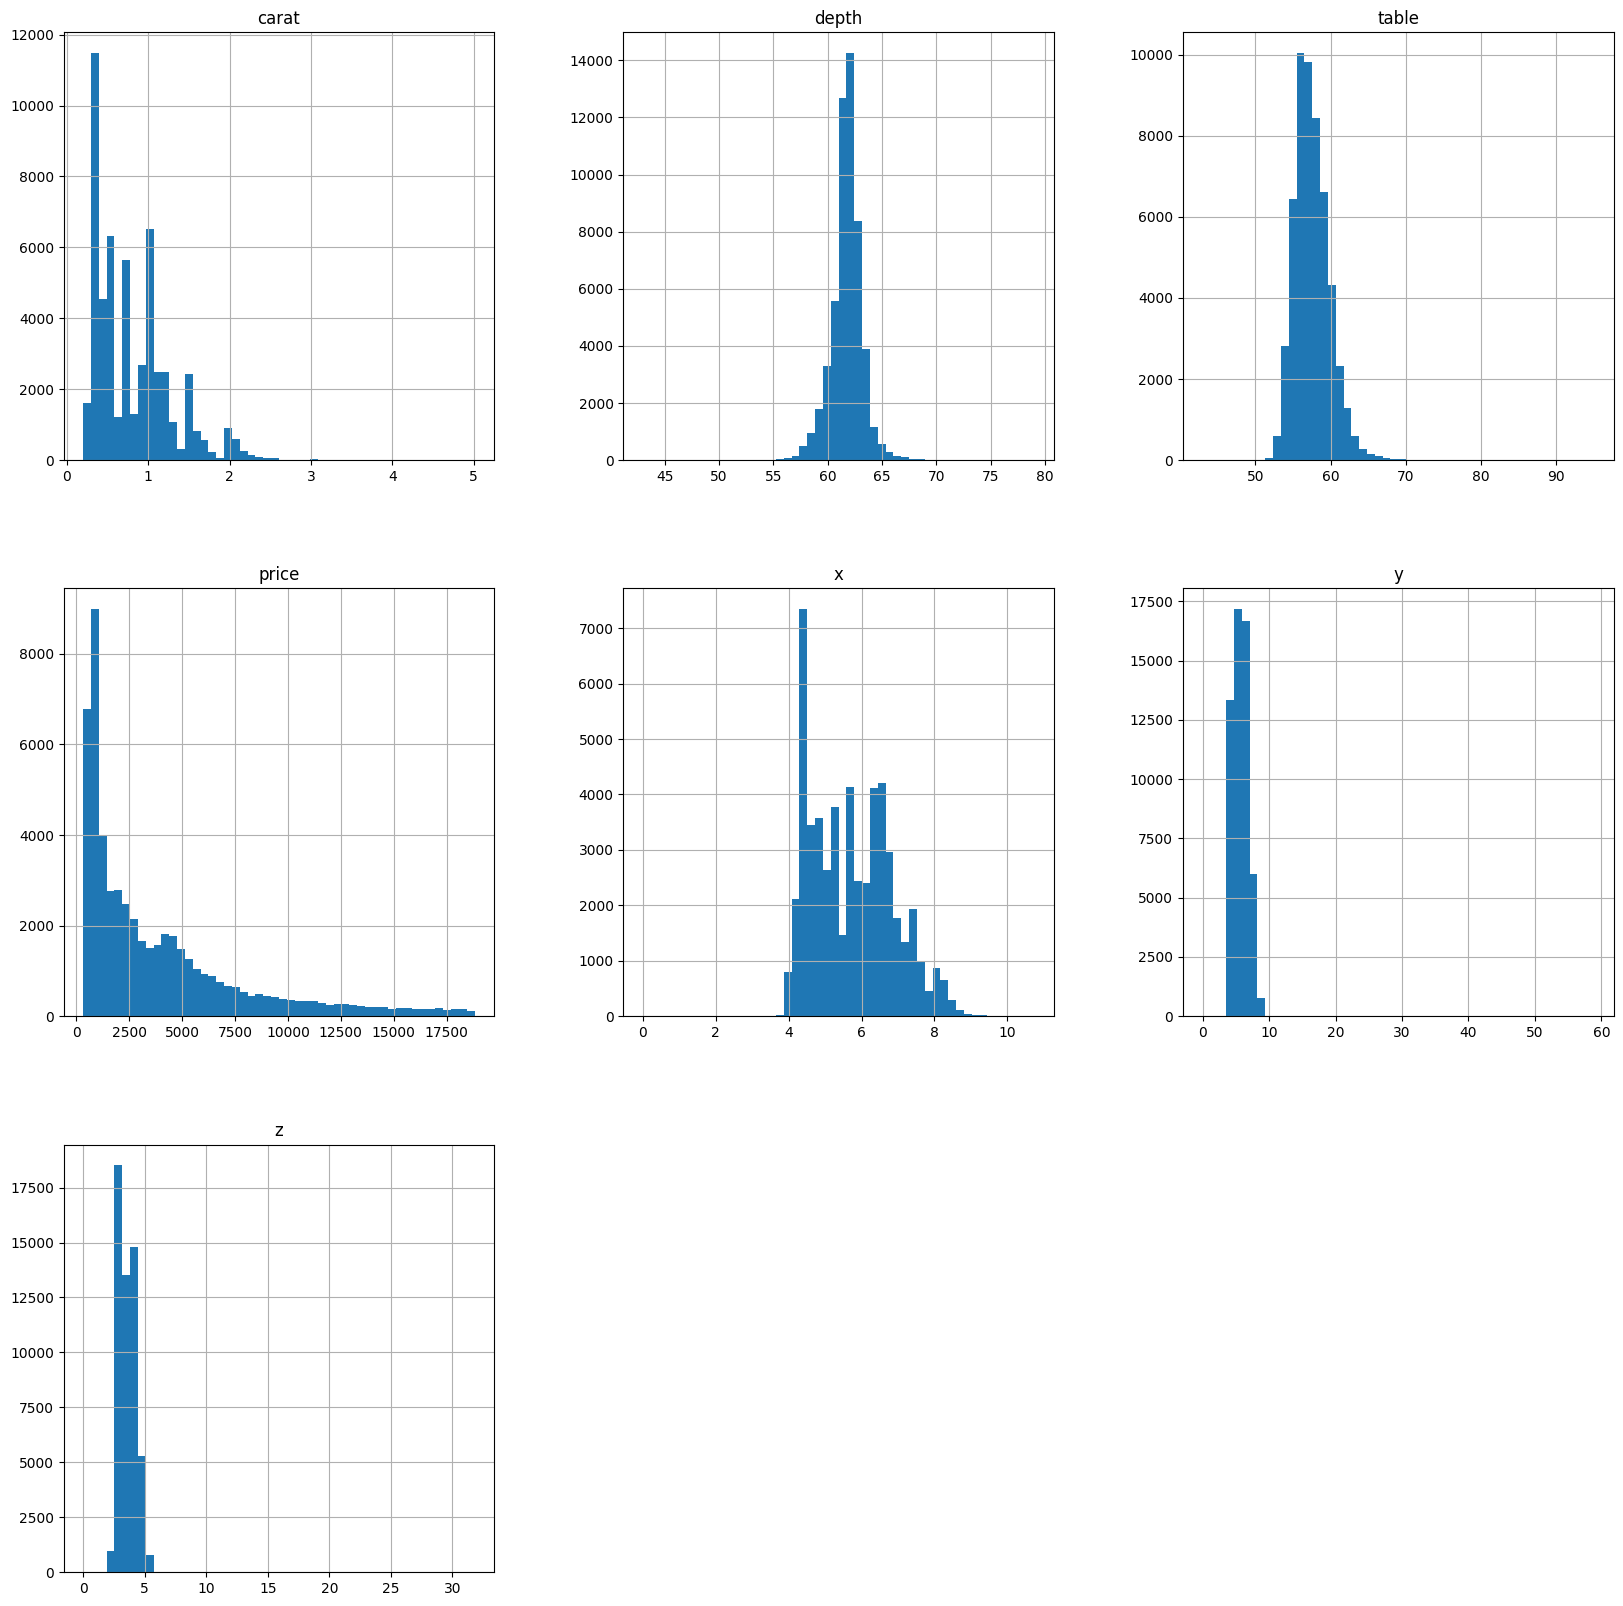

In [20]:
df.hist(bins=50, sharex=False, sharey=False, figsize=(20,20))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

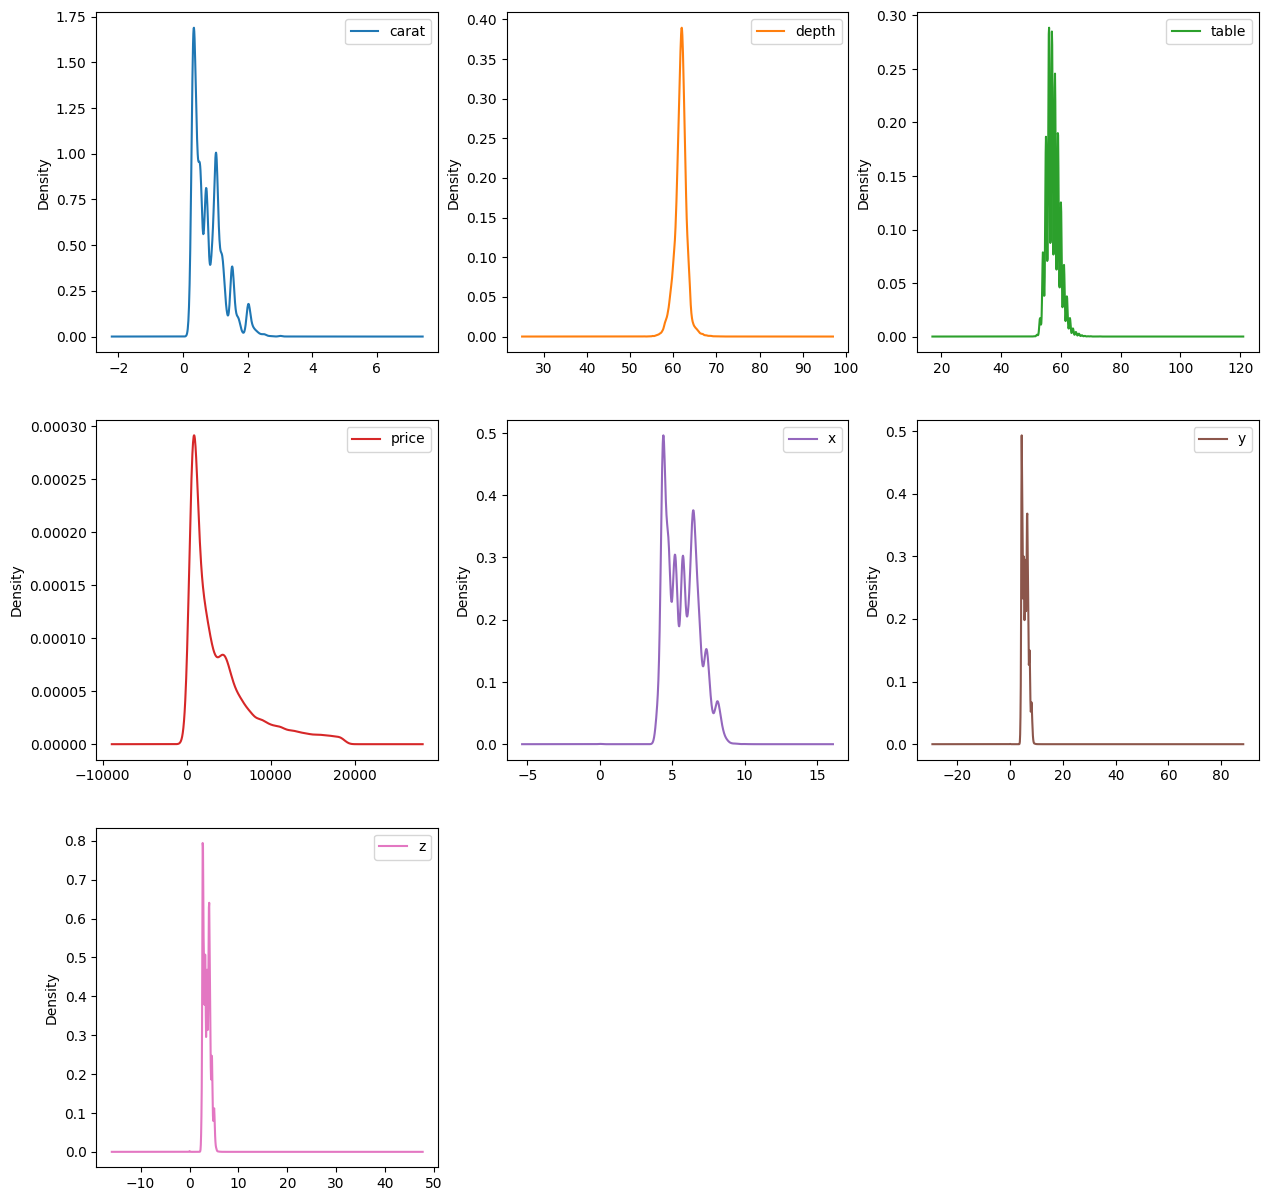

In [21]:
# Histogram --> way to old! Today: let us use density-plots
# Histogram --> need to set the number of bins
# Density Plot --> need to set the theoretical distribution, default: normal
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, figsize=(15,15))

In [24]:
# Correlatipn
correlation = df[["price", "carat", "table", "depth", "x", "y", "z"]].corr()
correlation

,price,carat,table,depth,x,y,z
price,1.000000,0.921591,0.127134,-0.010647,0.884435,0.865421,0.861249
carat,0.921591,1.000000,0.181618,0.028224,0.975094,0.951722,0.953387
table,0.127134,0.181618,1.000000,-0.295779,0.195344,0.183760,0.150929
depth,-0.010647,0.028224,-0.295779,1.000000,-0.025289,-0.029341,0.094924
x,0.884435,0.975094,0.195344,-0.025289,1.000000,0.974701,0.970772
y,0.865421,0.951722,0.183760,-0.029341,0.974701,1.000000,0.952006
z,0.861249,0.953387,0.150929,0.094924,0.970772,0.952006,1.000000


<Axes: title={'center': 'Correlation Matrix'}>

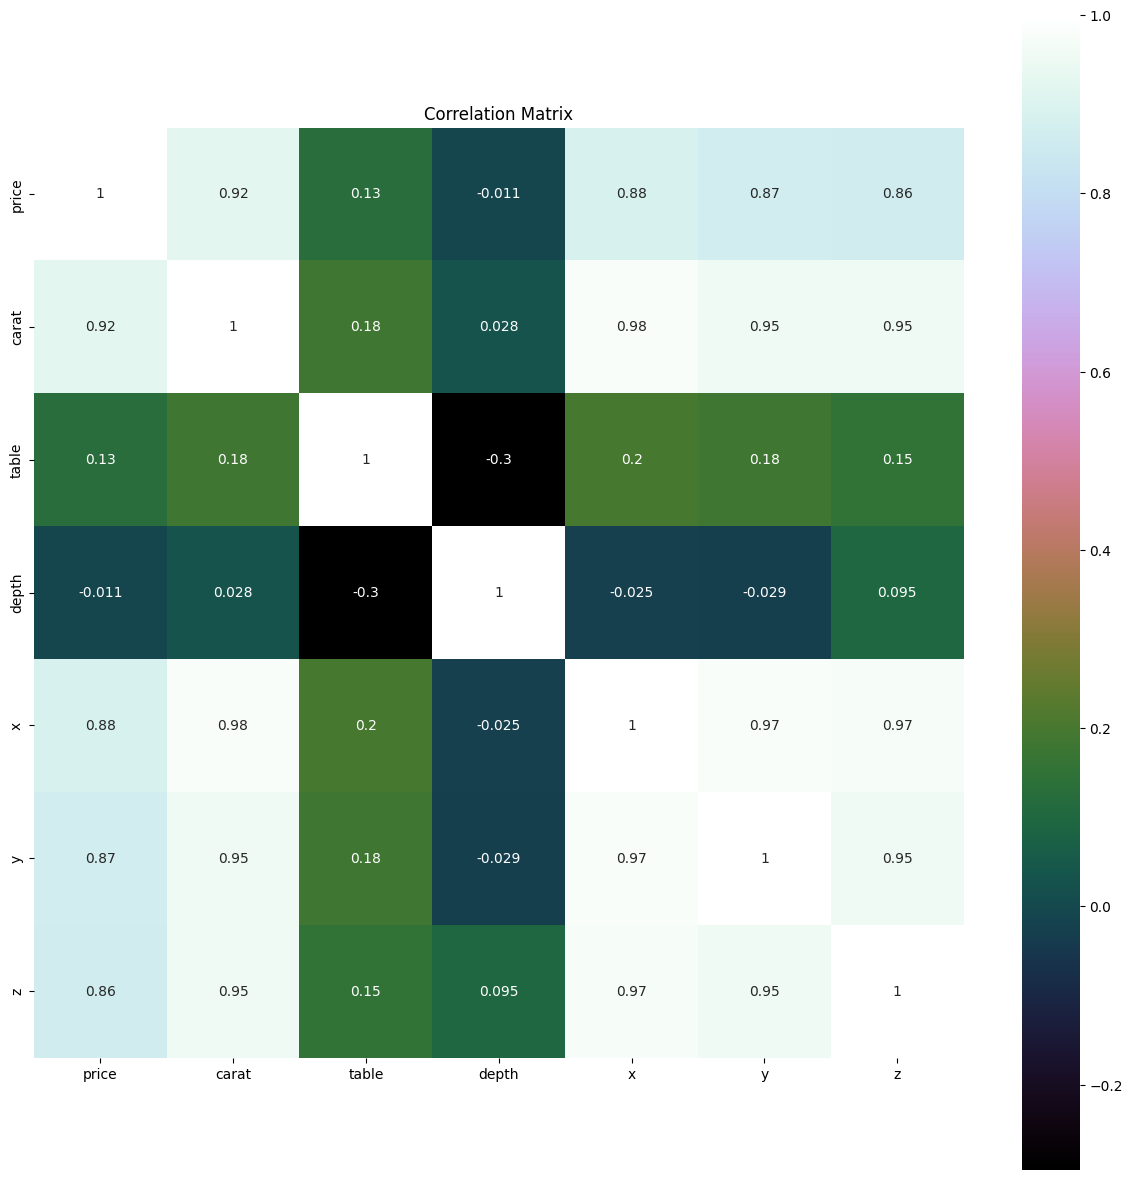

In [26]:
plt.figure(figsize=(15,15))
plt.title("Correlation Matrix")
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="cubehelix")

array([[<Axes: xlabel='carat', ylabel='carat'>,
        <Axes: xlabel='depth', ylabel='carat'>,
        <Axes: xlabel='table', ylabel='carat'>,
        <Axes: xlabel='price', ylabel='carat'>,
        <Axes: xlabel='x', ylabel='carat'>,
        <Axes: xlabel='y', ylabel='carat'>,
        <Axes: xlabel='z', ylabel='carat'>],
       [<Axes: xlabel='carat', ylabel='depth'>,
        <Axes: xlabel='depth', ylabel='depth'>,
        <Axes: xlabel='table', ylabel='depth'>,
        <Axes: xlabel='price', ylabel='depth'>,
        <Axes: xlabel='x', ylabel='depth'>,
        <Axes: xlabel='y', ylabel='depth'>,
        <Axes: xlabel='z', ylabel='depth'>],
       [<Axes: xlabel='carat', ylabel='table'>,
        <Axes: xlabel='depth', ylabel='table'>,
        <Axes: xlabel='table', ylabel='table'>,
        <Axes: xlabel='price', ylabel='table'>,
        <Axes: xlabel='x', ylabel='table'>,
        <Axes: xlabel='y', ylabel='table'>,
        <Axes: xlabel='z', ylabel='table'>],
       [<Axes: xlabel='ca

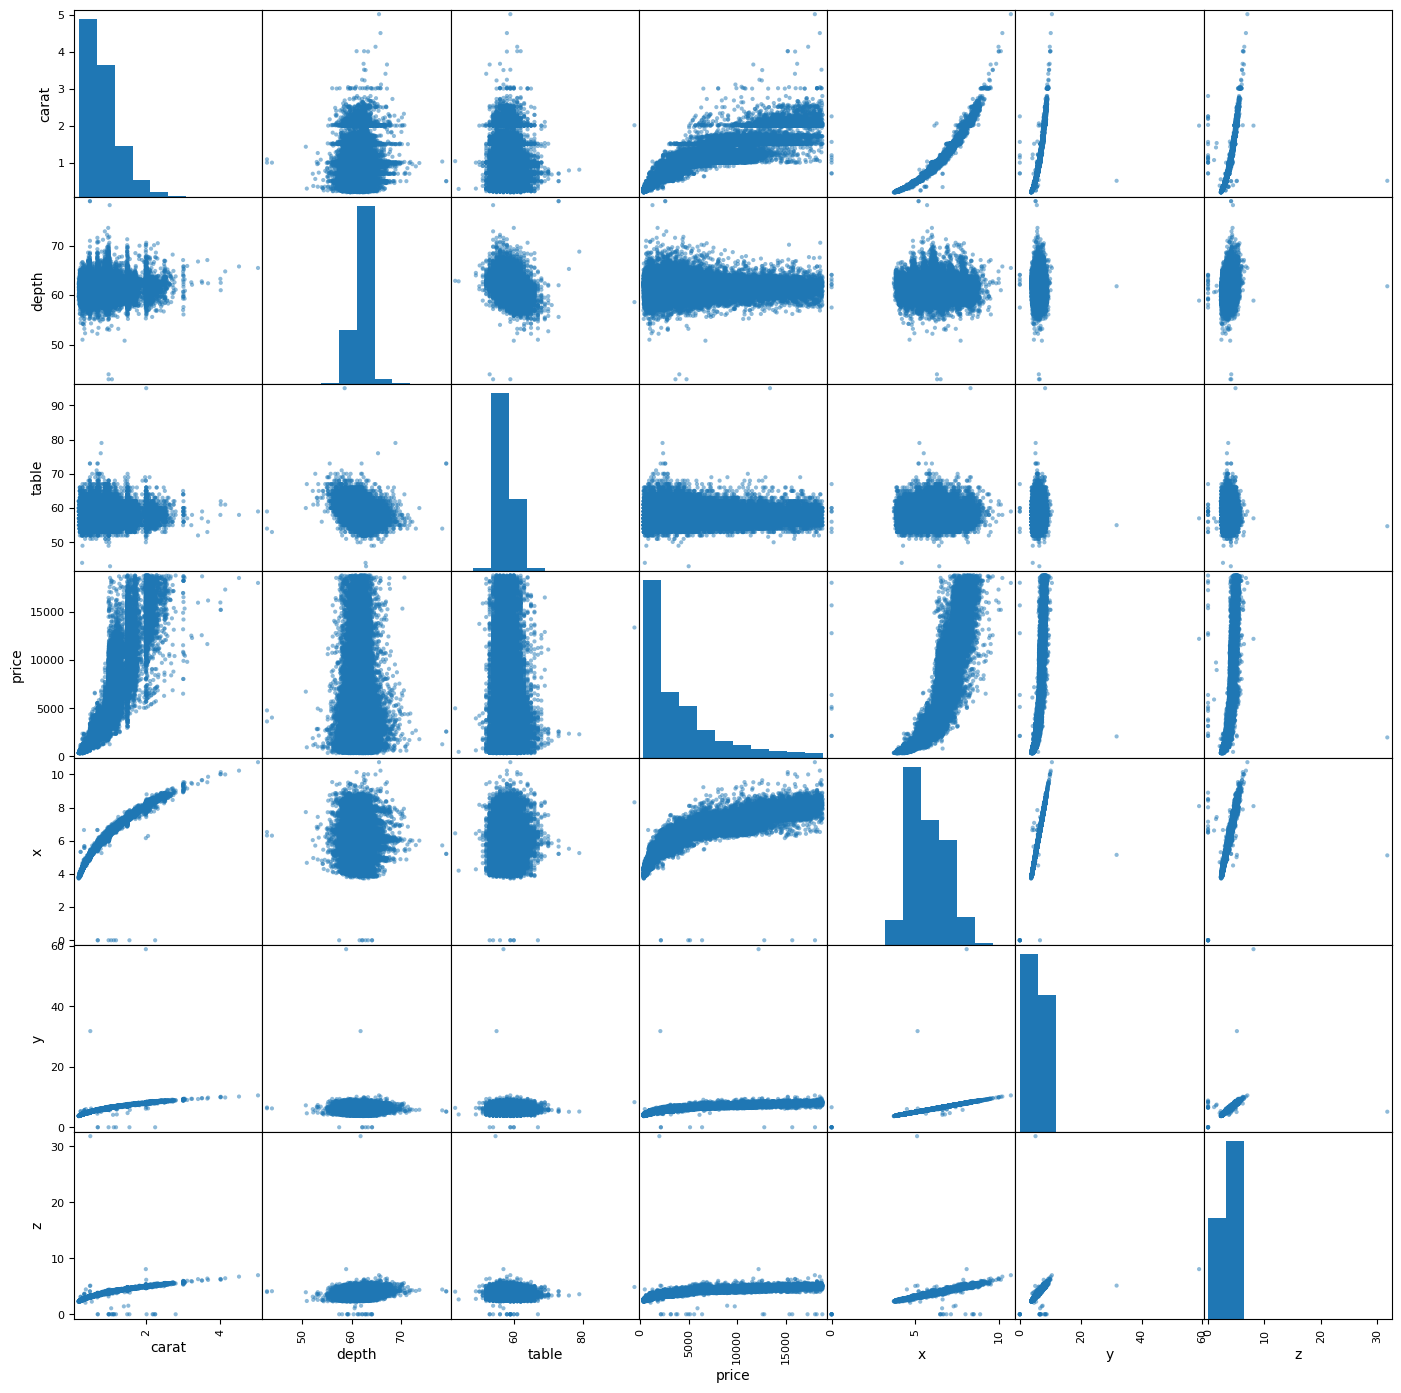

In [29]:
# Bivariate analysis
# Scatterplot matrix
scatter_matrix(df, figsize=(17,17))

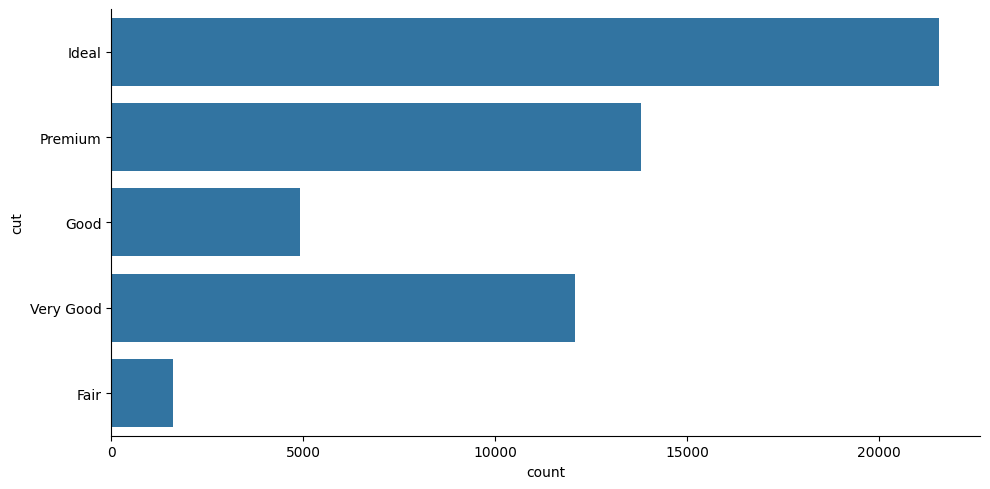

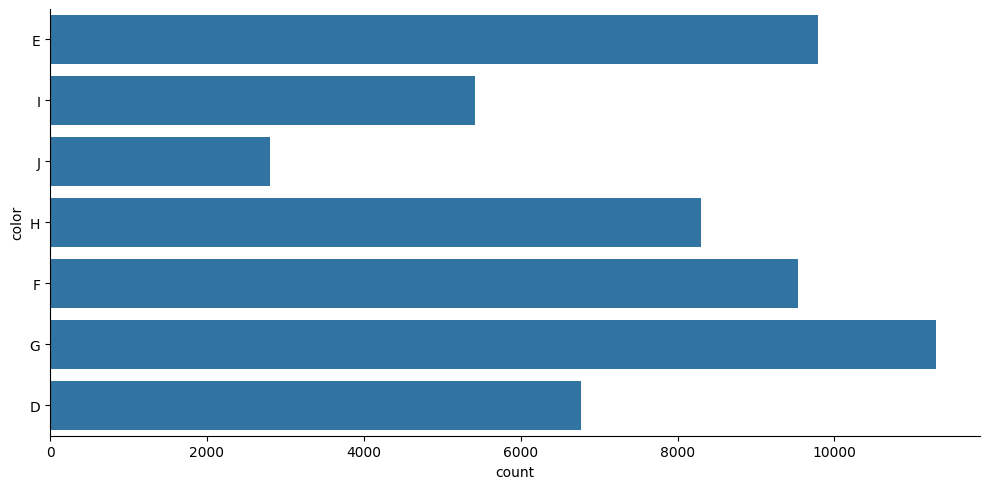

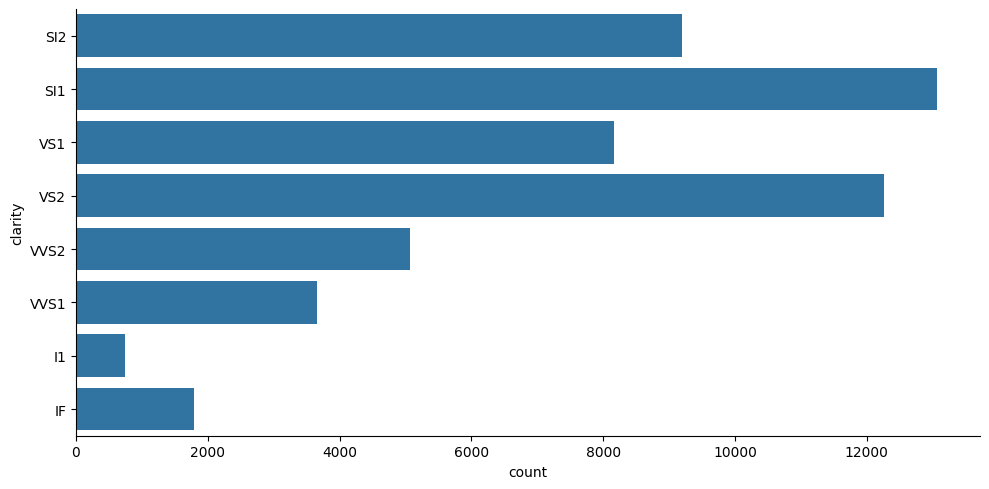

In [31]:
# categorical variables
for feature in df.dtypes[df.dtypes==object].index:
    sns.catplot(y=feature, data=df, kind='count', aspect=2)

<Axes: >

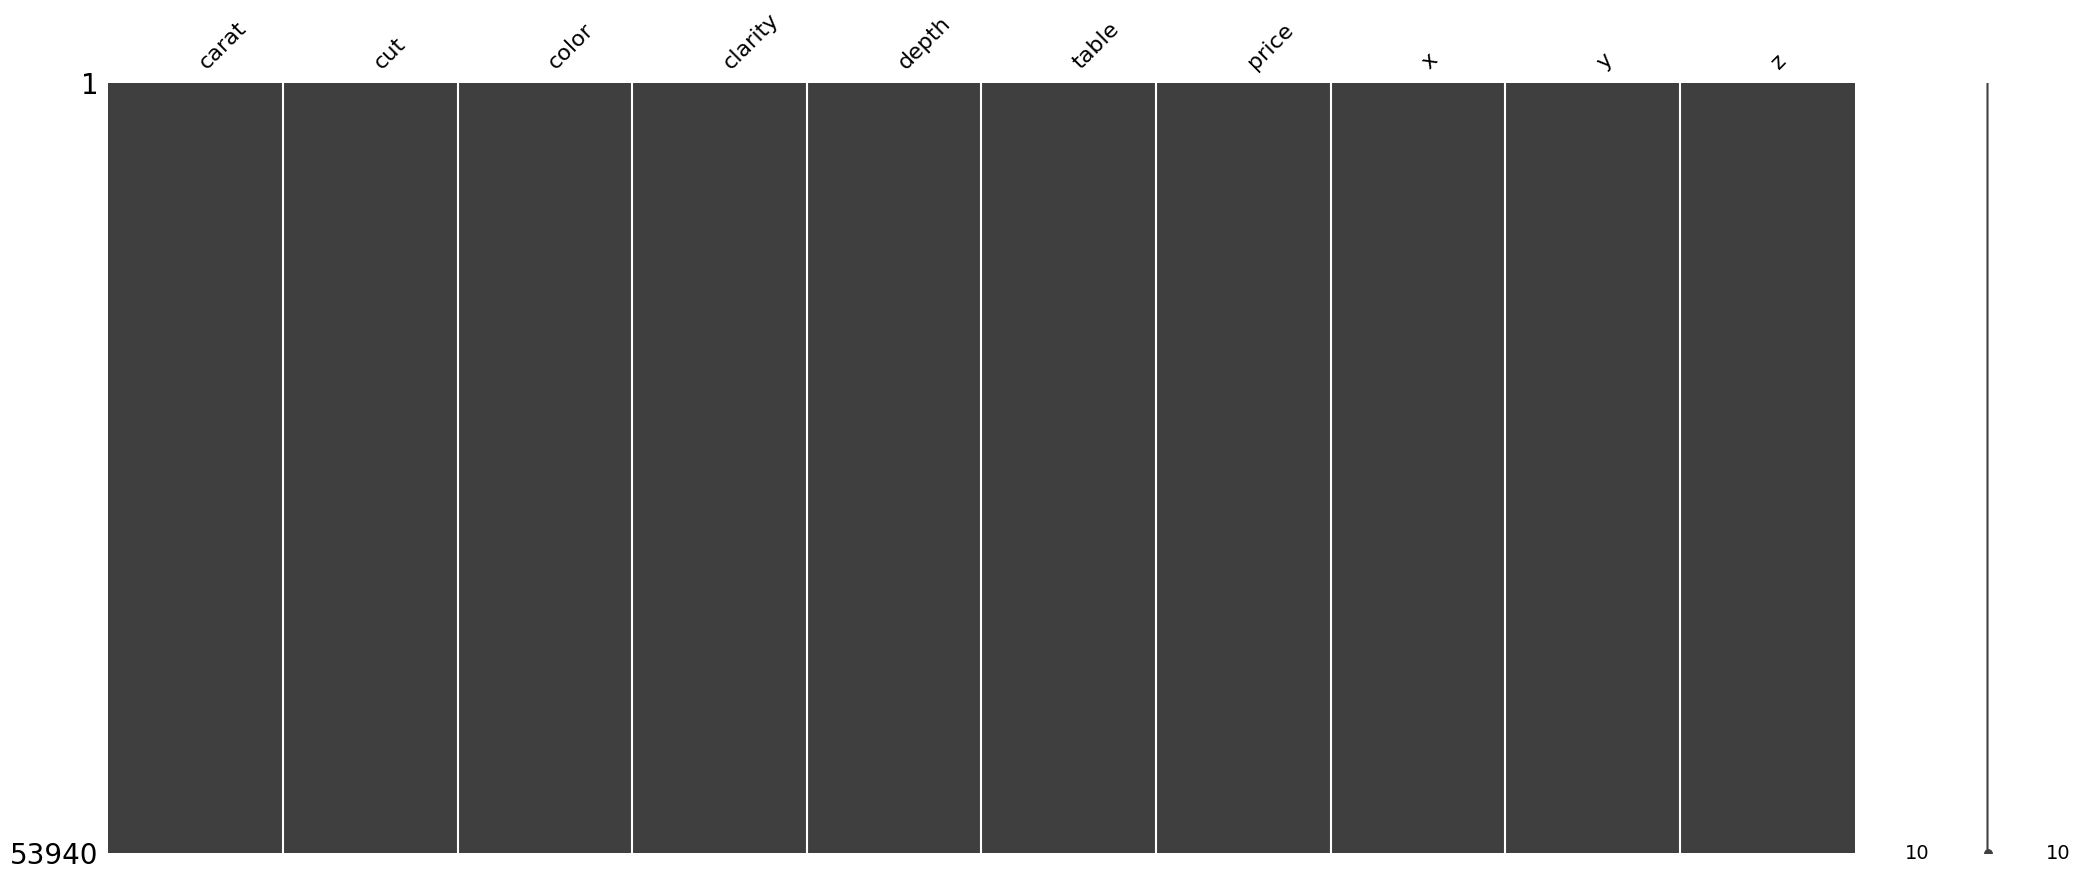

In [34]:
# Missing Values Analysis
msno.matrix(df)

## Data Preparation

- Handle Categorical variables
- Normalization: log, Box-Cox-Transformations
- Rescaling: z-Stand. , 0-1, ...
- Imputing missing values: mean substitution, kNN, Simple Imputation, Multiple Imputation, ...
- Feature Selection: Wrapper, Recusrive Feature Elimination, Anealing, ...
- Train and Testsplit: numpy, sklearn, tensorflow, ...
- ...

In [37]:
df_dummies = pd.get_dummies(df, columns=df.select_dtypes(['object']).columns, drop_first=True)
df_dummies.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
